In [1]:
!pip install ktrain

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 26.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (142 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 30.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 15.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.8 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 39.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 8.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... don

## Import the libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

2024-06-14 16:36:59.485080: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-14 16:37:01.725959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 16:37:01.726175: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 16:37:01.933067: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 16:37:02.489534: I tensorflow/core/platform/cpu_feature_guar

## Load the Data

In [4]:
df = pd.read_csv('/home/pgdai/Desktop/March24-DAI-Workspace/NLP and CV-June24/Day 11/SMSSpamCollection', sep='\t', names=['label', 'sms_message'])
df

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Cross Validation

In [5]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df, random_state=0, test_size=0.2)

In [6]:
data_train.shape, data_test.shape

((4457, 2), (1115, 2))

## Data Preprocessing

In [7]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(
    train_df = data_train,
    text_column = 'sms_message',
    label_columns = 'label',
    val_df = data_test,
    preprocess_mode = 'bert',)

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [8]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Build th Classifier

In [9]:
model = text.text_classifier(name = 'bert', train_data = (X_train, y_train), preproc = preproc)

Is Multi-Label? False
maxlen is 400


2024-06-14 16:38:47.759280: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/pgdai/.local/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [10]:
type(model)

keras.src.engine.functional.Functional

In [11]:
# Here we have taken batch size as 6 as from the documentation it is recommended to use this with maxlen as 500

learner = ktrain.get_learner(model = model, train_data = (X_train, y_train), val_data = (X_test, y_test), batch_size = 6)

In [12]:
learner

simulating training for different learning rates... this may take a few moments...


/home/pgdai/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 5427s 7s/step - loss: 0.2972 - accuracy: 0.8665
Epoch 2/2
743/743 [==============================] - 2287s 3s/step - loss: 1.7914 - accuracy: 0.7824


done.
Visually inspect loss plot and select learning rate associated with falling loss


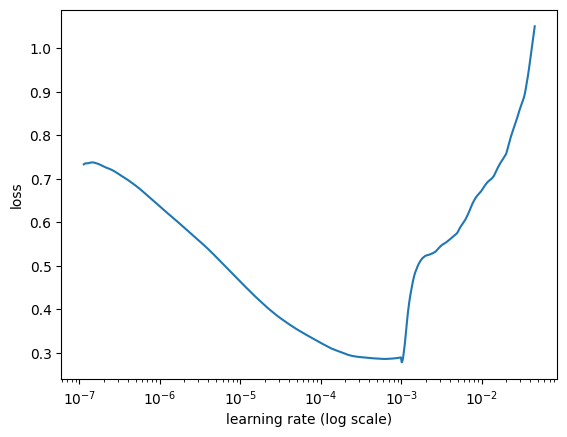

In [13]:
learner.lr_find(show_plot=True, max_epochs=2)

In [14]:
learner.fit_onecycle(lr=2e-5, epochs=1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bertspam--classifier')



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 5862s 8s/step - loss: 0.0937 - accuracy: 0.9722 - val_loss: 0.0166 - val_accuracy: 0.9964


/home/pgdai/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
msg1 = 'You win the casino game.'
predictor.predict(msg1)

'ham'